In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
label_name = "price"

In [4]:
X_raw = df.drop(label_name, axis=1)
y = df[label_name]

X_raw.shape, y.shape

((53940, 9), (53940,))

In [5]:
X = pd.get_dummies(X_raw)
X

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [7]:
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=[X.shape[1]]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3456      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 20,097
Trainable params: 20,097
Non-trainable params: 0
_________________________________________________________________


In [10]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [11]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', 'mae'])

In [12]:
history = model.fit(X_train, y_train, epochs=100, callbacks=early_stop, validation_split=0.2, verbose=0)

In [13]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,mse,mae,val_loss,val_mse,val_mae
0,1.558606e+07,1.558606e+07,2917.103027,1.175181e+07,1.175181e+07,2706.666504
1,5.554148e+06,5.554148e+06,1584.515381,2.327508e+06,2.327508e+06,935.254272
2,2.305058e+06,2.305058e+06,949.029480,1.262648e+06,1.262648e+06,626.856018
3,1.744609e+06,1.744609e+06,824.747131,1.027559e+06,1.027559e+06,588.949768
4,1.617545e+06,1.617545e+06,775.194824,1.064274e+06,1.064274e+06,624.880798
...,...,...,...,...,...,...
95,5.900379e+05,5.900379e+05,437.905975,3.928472e+05,3.928472e+05,349.118164
96,5.731958e+05,5.731958e+05,432.070343,4.240833e+05,4.240833e+05,379.211792
97,5.797984e+05,5.797984e+05,436.778473,3.919082e+05,3.919082e+05,349.323334
98,5.997199e+05,5.997199e+05,441.987030,3.923588e+05,3.923588e+05,367.291046


<AxesSubplot:>

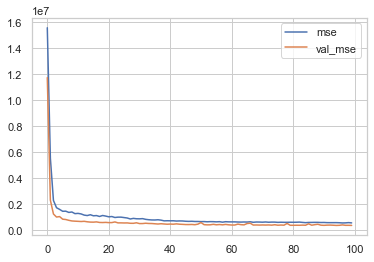

In [14]:
df_hist[["mse", "val_mse"]].plot()

In [15]:
y_predict = model.predict(X_test)
y_predict = y_predict.flatten()
y_predict

array([ 597.31885, 2480.8804 , 1295.6976 , ..., 3074.5063 ,  812.9579 ,
       1634.1674 ], dtype=float32)

In [16]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.9734497014681283